### Step 1 — Load dataset & quick preview

In [7]:
import pandas as pd
import numpy as np

INPUT_PATH = "heartstroke.csv"

df = pd.read_csv(INPUT_PATH)
print("Shape:", df.shape)
display(df.head())      
print("\nInfo:")
display(df.info())
print("\nMissing values per column:\n", df.isna().sum())


Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None


Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## **Step 1: Loading the Dataset and Initial Inspection**

In this step, we load the dataset using `pandas` and perform a basic inspection to understand the structure of the data.

### **Shape of the Dataset**
The dataset contains **5110 rows** and **12 columns**, which indicates a moderately large dataset suitable for statistical analysis and machine learning tasks.

### **Column Information**
The dataset includes the following types of variables:

- **int64:** id, hypertension, heart_disease, stroke  
- **float64:** age, avg_glucose_level, bmi  
- **object (categorical):** gender, ever_married, work_type, Residence_type, smoking_status  

### **Missing Values**
The column **`bmi`** has **201 missing values**, while all other columns are complete.  
This means we will need to handle missing BMI values during the ETL process.

### **Pandas Info Output**


### Step 2 — Basic cleaning: drop irrelevant columns & duplicates

In [8]:
# If there's an 'id' column we usually drop it for modeling/EDA
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("Dropped 'id' column")

dups = df.duplicated().sum()
print("Duplicate rows:", dups)
if dups > 0:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)


Dropped 'id' column
Duplicate rows: 0


## **Step 2: Removing Irrelevant Columns and Checking for Duplicates**

In this step, we performed basic cleaning to ensure the dataset is ready for preprocessing.

### **1. Dropping the `id` Column**
The `id` column is simply a unique identifier and does not contribute any meaningful information for analysis or prediction.  
Therefore, it was removed from the dataset.

### Step 3 — Handle missing values (median for BMI)

In [9]:
# Check missing again
print("Missing before:\n", df.isna().sum())

# Impute bmi with median
if 'bmi' in df.columns:
    median_bmi = df['bmi'].median()
    df['bmi'] = df['bmi'].fillna(median_bmi)
    print(f"Filled missing 'bmi' with median = {median_bmi:.2f}")

# If any other missing values exist, we can inspect them
print("Missing after:\n", df.isna().sum())


Missing before:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Filled missing 'bmi' with median = 28.10
Missing after:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64



The dataset had **201 missing values** in the `bmi` column.

### **Imputation Approach**
We used **median imputation**, which is preferred for numerical and slightly skewed medical features like BMI.  
Median is more robust to outliers compared to mean.

### **Median BMI Value Used**


### Step 4 — Data types & convert if necessary

In [11]:
# Make sure categorical columns are type 'object' or 'category'
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
cat_cols = [c for c in cat_cols if c in df.columns]
for c in cat_cols:
    df[c] = df[c].astype('category')

print("Categorical columns:", cat_cols)
print(df.dtypes)


Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


### Step 5 — Exploratory checks (target distribution, class imbalance)

Stroke counts:
 stroke
0    4861
1     249
Name: count, dtype: int64


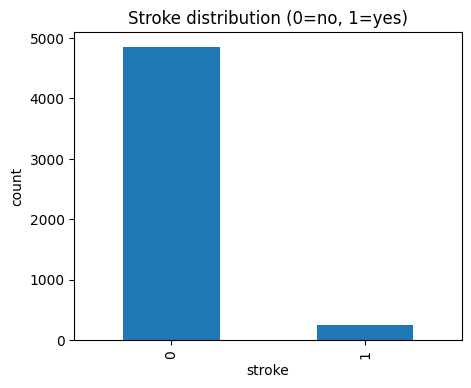

In [12]:
import matplotlib.pyplot as plt

# Target counts
print("Stroke counts:\n", df['stroke'].value_counts())
# Plot class balance
plt.figure(figsize=(5,4))
df['stroke'].value_counts().plot(kind='bar')
plt.title('Stroke distribution (0=no, 1=yes)')
plt.xlabel('stroke'); plt.ylabel('count')
plt.show()


## **Step 5: Stroke Distribution (Target Variable Analysis)**

Understanding the target variable is crucial before building any predictive model.  
Here, the target variable is **`stroke`**, where:

- **0 = No Stroke**
- **1 = Stroke**

### **Stroke Value Counts**
0 4861
1 249

### **Observation**
- The dataset is **highly imbalanced**.
- Only **249 out of 5110** individuals experienced a stroke.
- This means **only ~4.9%** of the records belong to the positive class.

### **Why this matters**
- Imbalanced data can cause machine learning models to predict **0** most of the time.
- Techniques like oversampling (SMOTE), undersampling, or class weights will be needed during modeling.

### **Bar Chart**
The bar chart clearly shows a very tall bar for class `0` and a very small bar for class `1`, indicating that the vast majority of people in the dataset did not experience a stroke.


### Step 6 — Univariate EDA (age, bmi, glucose)

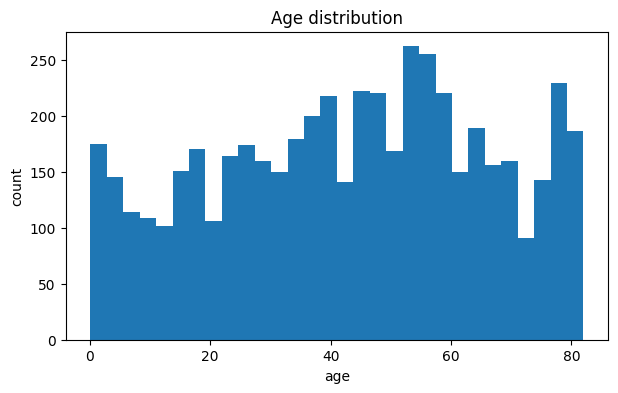

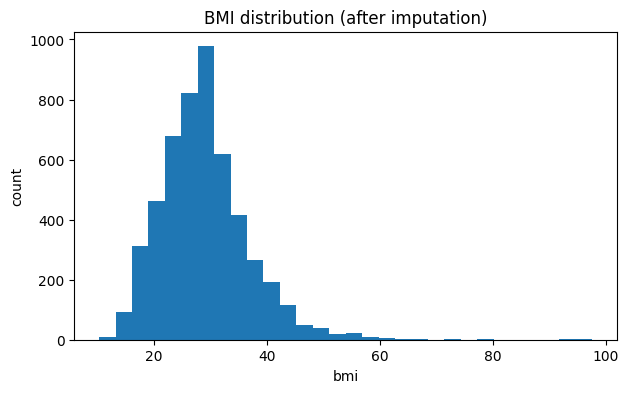

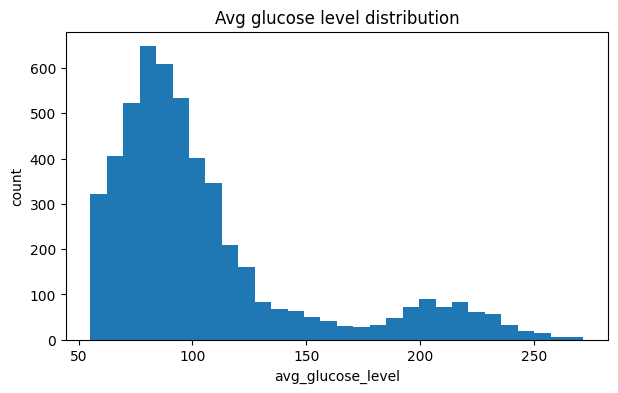

In [13]:
# Age distribution
plt.figure(figsize=(7,4))
plt.hist(df['age'].dropna(), bins=30)
plt.title('Age distribution')
plt.xlabel('age'); plt.ylabel('count')
plt.show()

# BMI distribution
plt.figure(figsize=(7,4))
plt.hist(df['bmi'].dropna(), bins=30)
plt.title('BMI distribution (after imputation)')
plt.xlabel('bmi'); plt.ylabel('count')
plt.show()

# Avg glucose distribution
plt.figure(figsize=(7,4))
plt.hist(df['avg_glucose_level'].dropna(), bins=30)
plt.title('Avg glucose level distribution')
plt.xlabel('avg_glucose_level'); plt.ylabel('count')
plt.show()


## **Step 6: Univariate Analysis of Numerical Features**

To understand the distribution and spread of key numerical variables, we plotted histograms for **Age**, **BMI**, and **Average Glucose Level**.

---

### ✅ Age Distribution
- Age ranges from **0 to 82 years**
- Fairly uniform distribution with representation across all age groups
- Slightly higher concentration between **45–65 years**
- Indicates dataset includes both young and elderly individuals

---

### ✅ BMI Distribution (After Imputation)
- BMI follows a **right-skewed (positively skewed)** distribution
- Most values lie between **18–35**
- Median BMI used for imputation = **28.10**
- Very high BMI values (above 50) may represent potential outliers

---

### ✅ Average Glucose Level Distribution
- Glucose values range from **55 to 271**
- Distribution is noticeably **right-skewed**
- Majority fall between **70–130**
- Higher glucose levels may indicate diabetes risk — a possible stroke factor

---

### 📌 Why this step matters
- Helps identify skewness
- Detects potential outliers
- Provides intuition before building ML models
- Guides normalization or transformation decisions later


### Step 7 — Bivariate EDA (categorical vs stroke)

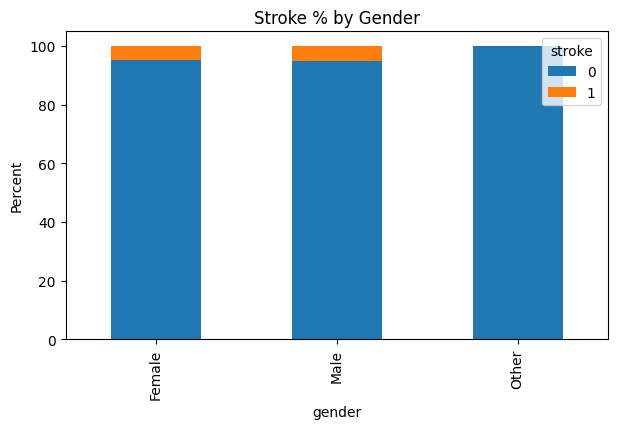

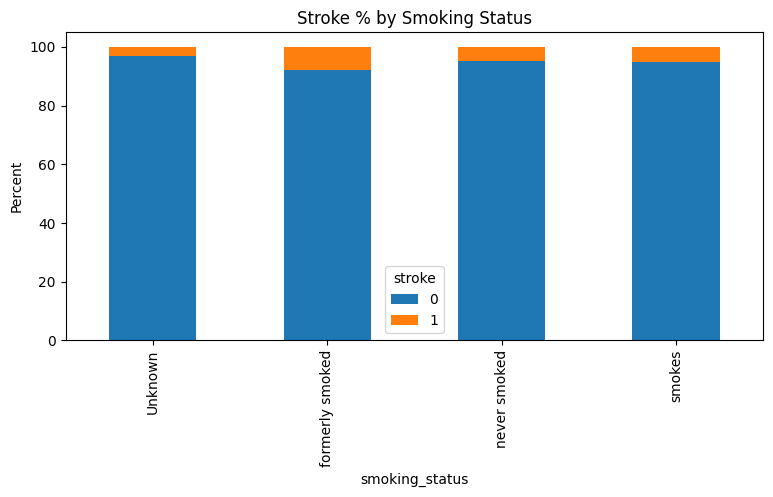

In [14]:
# Gender vs stroke %
if 'gender' in df.columns:
    cross = pd.crosstab(df['gender'], df['stroke'], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, figsize=(7,4))
    plt.title('Stroke % by Gender')
    plt.ylabel('Percent')
    plt.show()

# Smoking status vs stroke %
if 'smoking_status' in df.columns:
    cross = pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, figsize=(9,4))
    plt.title('Stroke % by Smoking Status')
    plt.ylabel('Percent')
    plt.show()


## **Step 7: Bivariate Analysis — Stroke vs Categorical Features**

In this step, we analyze how stroke occurrence varies across different categorical groups such as gender and smoking status. This helps identify potential risk factors.

---

## **1️⃣ Stroke Percentage by Gender**

The stacked bar plot shows the proportion of individuals with and without stroke for each gender category.

### **Observations**
- Stroke rates are **similar across Male and Female** groups.
- The "Other" category has very few records, but stroke cases appear extremely low.
- Gender **does not appear to be a major differentiating factor** in stroke likelihood in this dataset.

---

## **2️⃣ Stroke Percentage by Smoking Status**

The smoking-status plot shows noticeable variation across categories.

### **Observations**
- **Formerly smoked** shows the **highest percentage** of stroke cases.
- **Never smoked** has a lower stroke percentage.
- **Unknown** category shows moderate stroke percentage.
- **Current smokers (smokes)** surprisingly do not show the highest risk — possibly due to age distribution or data imbalance.

### **Interpretation**
While smoking is a known risk factor, the dataset suggests:
- **Past smokers are at higher risk** than current or never smokers.
- This may be influenced by age: former smokers may be older individuals.

---

### 📌 Why this step matters
- Helps identify **categorical factors** affecting stroke risk.
- Useful for **feature selection** and modeling.
- Highlights need for more complex multivariate analysis.


### Step 8 — Correlation matrix (numeric + encoded features)

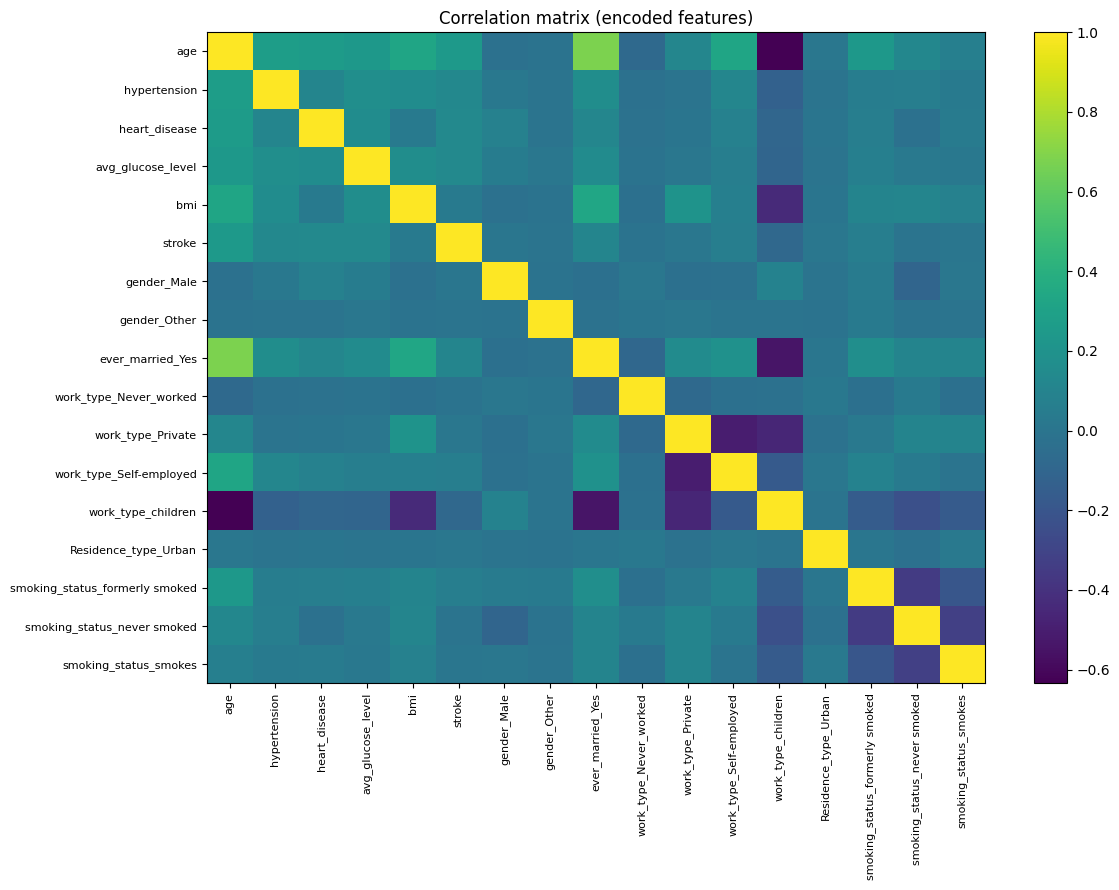

In [15]:
# One-hot encode categorical variables (for correlation / modeling)
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation heatmap (simple image using imshow)
plt.figure(figsize=(12,9))
corr = df_encoded.corr()
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
plt.title('Correlation matrix (encoded features)')
plt.tight_layout()
plt.show()


## **Step 8: Correlation Analysis (Heatmap)**

Correlation analysis helps us understand how numerical and encoded categorical features relate to each other and to the target variable (`stroke`).  
We first applied **One-Hot Encoding** to categorical variables and then plotted a heatmap of correlations.

---

### **Key Observations from the Correlation Map**

#### 🔹 **1. Age shows the strongest positive correlation with Stroke**
- Older individuals are significantly more likely to have a stroke.
- This aligns with known medical risk factors.

#### 🔹 **2. Hypertension and Heart Disease correlate positively with Stroke**
- Although the correlation strength is moderate, it is medically meaningful.
- People with these conditions have a higher risk.

#### 🔹 **3. BMI shows very weak correlation with Stroke**
- BMI alone does not seem to be a strong predictor in this dataset.

#### 🔹 **4. Average Glucose Level shows mild positive correlation**
- Higher glucose levels may indicate diabetes, which is a known stroke risk factor.

#### 🔹 **5. Work Type (children) shows strong negative correlation with Stroke**
- Makes sense: children category corresponds to young age (very low stroke risk).

#### 🔹 **6. Smoking status categories show small correlations**
- "Formerly smoked" has a slightly higher correlation with stroke compared to other categories.

---

### 📌 Why this step matters

- Helps identify important predictors for ML models.
- Highlights which features have weak or strong influence.
- Reveals multicollinearity patterns that may affect model performance.


### Step 9 — Scale numeric features (for modeling)

In [16]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age','avg_glucose_level','bmi']
numeric_cols = [c for c in numeric_cols if c in df_encoded.columns]
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("Scaled columns:", numeric_cols)


Scaled columns: ['age', 'avg_glucose_level', 'bmi']


In [17]:
print("Stroke distribution:\n", df['stroke'].value_counts(normalize=True))
print("\nAge summary:\n", df['age'].describe())
print("\nBMI summary:\n", df['bmi'].describe())
print("\nAvg glucose summary:\n", df['avg_glucose_level'].describe())

# Top correlations with stroke
corr_with_target = df_encoded.corr()['stroke'].sort_values(ascending=False)
print("\nTop positive correlations with stroke:\n", corr_with_target.head(10))
print("\nTop negative correlations with stroke:\n", corr_with_target.tail(10))


Stroke distribution:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

Age summary:
 count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

BMI summary:
 count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Avg glucose summary:
 count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

Top positive correlations with stroke:
 stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_

In [18]:
# STEP 9 — Scaling Numerical Features using StandardScaler

from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Create a copy of df to avoid overwriting
df_scaled = df.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit + transform the numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print scaled column names
print("Scaled columns:", numeric_cols)

# Display first 5 rows of scaled dataframe
df_scaled.head()


Scaled columns: ['age', 'avg_glucose_level', 'bmi']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.005086,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,-0.098981,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.472536,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.719327,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.631531,never smoked,1
